In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
833,2672-TGEFF,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.80,3340.55,No
5793,3873-NFTGI,Male,0,No,No,14,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,767.55,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
5193,7096-ZNBZI,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),26.45,1914.5,No
368,9571-EDEBV,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,No
3074,4504-YOULA,Female,0,Yes,Yes,35,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),59.45,2136.9,No
6598,6169-PGNCD,Female,0,No,No,57,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),74.30,4166.35,No
2591,8384-FZBJK,Female,0,Yes,Yes,57,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,5611.7,No
3965,3692-JHONH,Female,1,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,5621.85,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No


In [3]:
rows = df.shape[0]
column = df.shape[1]

print(rows)
print(column)


7043
21


In [4]:
df.drop('customerID',axis = 'columns',inplace = True)

In [5]:
df.dtypes   # show all the remaining columns datatypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df1= df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_20/3157282470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

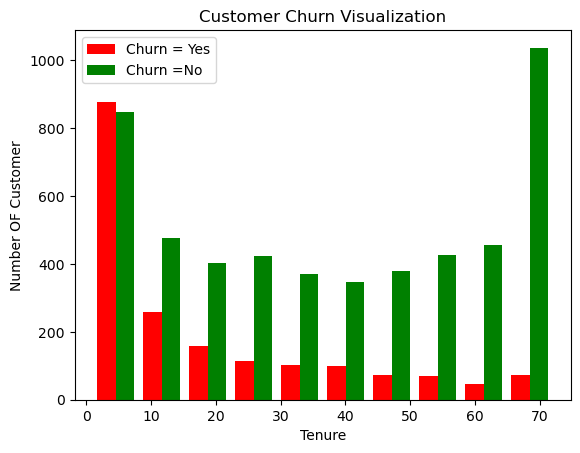

In [16]:
tenure_churn_no = df1[df1.Churn =='No'].tenure
tenure_churn_yes = df1[df1.Churn =='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number OF Customer")
plt.title("Customer Churn Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'],label = ['Churn = Yes','Churn =No'])
plt.legend()

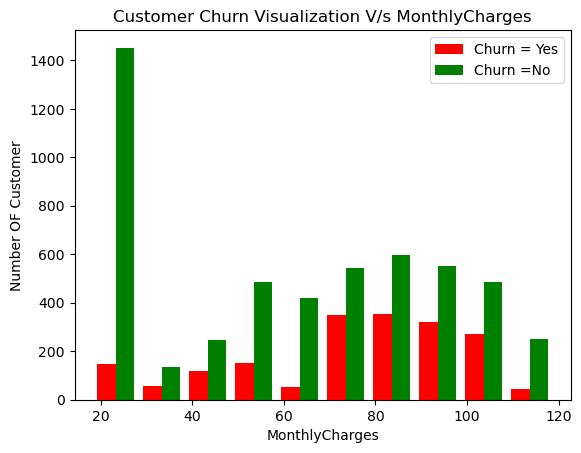

In [17]:
mc_churn_no = df1[df1.Churn =='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn =='Yes'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number OF Customer")
plt.title("Customer Churn Visualization V/s MonthlyCharges")
plt.hist([mc_churn_yes, mc_churn_no], color=['red','green'],label = ['Churn = Yes','Churn =No'])
plt.legend()

In [18]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df1[column].unique()}')

In [19]:
print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

/tmp/ipykernel_20/477714218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
/tmp/ipykernel_20/477714218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [21]:
print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
yes_no_column = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [23]:
for col in yes_no_column:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/tmp/ipykernel_20/199950172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':0,'Male':1},inplace = True)
df1['gender'].replace({'Female':0,'Male':1},inplace = True)

/tmp/ipykernel_20/350613271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0,'Male':1},inplace = True)
/tmp/ipykernel_20/350613271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0,'Male':1},inplace = True)


In [26]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df1.shape

(7032, 20)

In [28]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [29]:
col_to_scale= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [30]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1547,0,0,1,0,0.873239,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3925,0,0,1,0,0.507042,1,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
6612,1,0,1,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [34]:
X_train.shape

(5625, 26)

In [35]:
y_train.shape

(5625,)

In [36]:
len(X_train.columns)

26

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(units= 10,activation = 'relu'),
                    Dense(units= 20,activation = 'relu'),
                   Dense(units= 1,activation = 'sigmoid')])

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics= ['accuracy'])
model.fit(X_train,y_train,epochs=100)                         
                         

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5233 - accuracy: 0.7479
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7847
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7943
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7979
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8018
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8036
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8059
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accura

In [38]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7733


[0.4639158546924591, 0.7732764482498169]

In [39]:
yp = model.predict(X_test)
yp[:10]


44/44 [==============================] - 0s 1ms/step


array([[0.36930686],
       [0.5060467 ],
       [0.01293222],
       [0.778224  ],
       [0.42187056],
       [0.9161039 ],
       [0.05229056],
       [0.46968347],
       [0.3778666 ],
       [0.15614364]], dtype=float32)

In [40]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [41]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'truth')

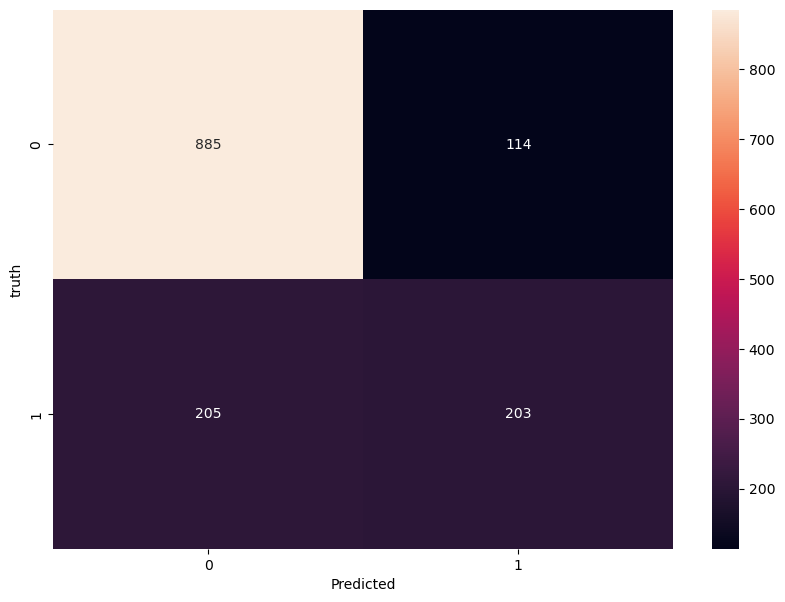

In [44]:
import seaborn as sn
cn = tf.math.confusion_matrix(labels=y_test,predictions = y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [45]:
(873+236)/(1407)

0.7882018479033405

In [46]:
X_test.shape

(1407, 26)